In [6]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
creditDf = pd.read_excel('./default of credit card clients.xls', header=1)

In [8]:
creditDf.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
creditDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [10]:
creditDf.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

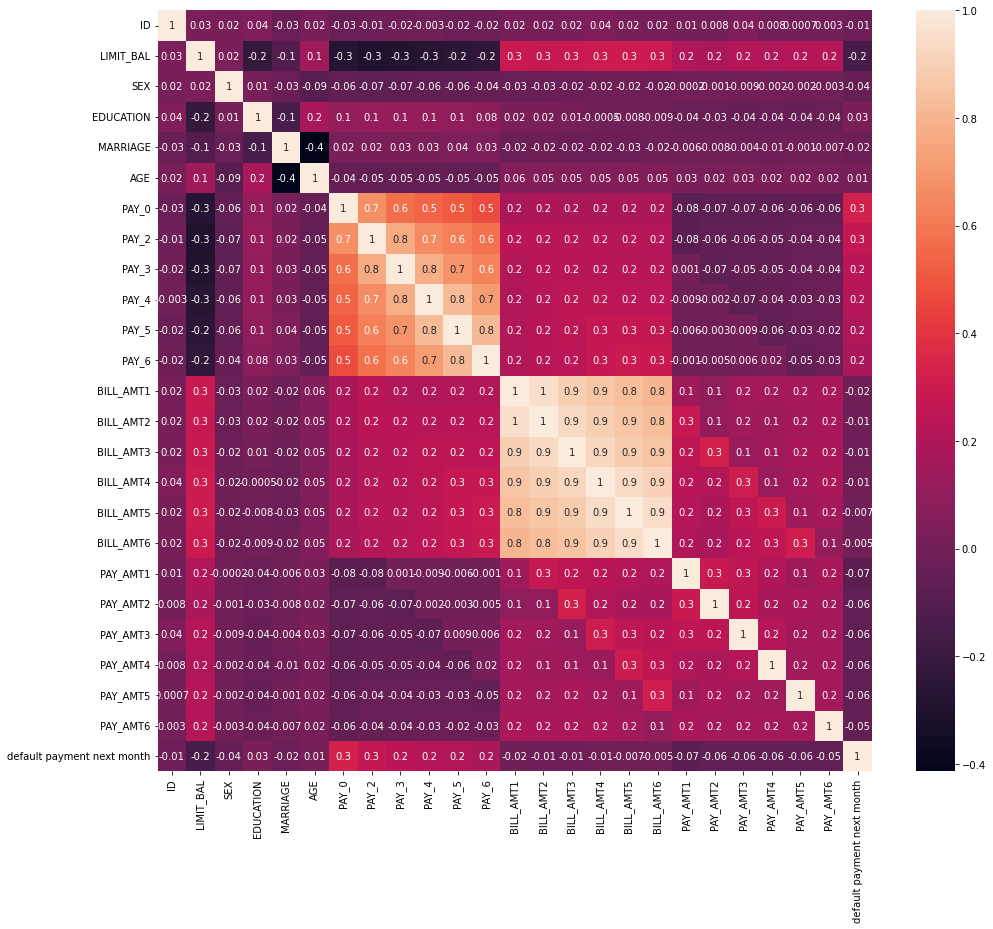

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = creditDf.corr()
plt.figure(figsize=(16,14))

sns.heatmap(corr, annot=True, fmt='.1g')
plt.show()

In [12]:
data = creditDf.iloc[:, 1:-1]
target = creditDf.iloc[:, -1]

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)

#### PCA 주성분 분석

In [15]:
pca = PCA()

In [16]:
# 지정된 데이터에서 주성분 추출
pca.fit(data_scaled)

PCA()

In [17]:
# 주성분 행렬
pca.singular_values_

array([443.04929774, 350.6420357 , 215.70539822, 210.16175361,
       175.37713289, 169.45792011, 165.00799458, 163.18238146,
       161.67090383, 153.25759279, 148.26882983, 143.12454352,
       130.87573497, 125.42606134, 110.04188243,  88.29841154,
        86.45145711,  75.23782289,  62.87756995,  45.87669015,
        34.97910792,  27.54735755,  26.39274393])

In [18]:
# 주성분에 투영 후 분산 비율
pca.explained_variance_ratio_

array([0.28448215, 0.17818817, 0.06743307, 0.06401154, 0.04457556,
       0.04161737, 0.03946035, 0.03859201, 0.03788041, 0.03404042,
       0.03186036, 0.02968788, 0.02482385, 0.02279956, 0.01754959,
       0.01129943, 0.01083167, 0.00820396, 0.00572984, 0.00305025,
       0.00177324, 0.00109979, 0.00100953])

#### 주성분 갯수 지정
---
- 방법 1) explained_variance_ratio_의 누적값에서 원하는 분포 정도 지정해서 PC 갯수 수동 계산
- 방법 2) n_components = 0.0~1.0: 주성분 투영된 데이터 분포 정도 지정하면 PC 갯수 자동 계산

In [19]:
pca2 = PCA(n_components=0.95)

In [20]:
pca2.fit(data_scaled)

PCA(n_components=0.95)

In [21]:
# 주성분에 투영 후 분산 비율
pca2.explained_variance_ratio_

array([0.28448215, 0.17818817, 0.06743307, 0.06401154, 0.04457556,
       0.04161737, 0.03946035, 0.03859201, 0.03788041, 0.03404042,
       0.03186036, 0.02968788, 0.02482385, 0.02279956, 0.01754959])

In [22]:
creditPCA = pca2.transform(data_scaled)
creditPCA.shape

(30000, 15)

In [23]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [24]:
cumsum

array([0.28448215, 0.46267032, 0.53010339, 0.59411493, 0.63869049,
       0.68030786, 0.71976821, 0.75836022, 0.79624063, 0.83028105,
       0.8621414 , 0.89182928, 0.91665313, 0.93945269, 0.95700228,
       0.96830172, 0.97913339, 0.98733735, 0.99306718, 0.99611743,
       0.99789068, 0.99899047, 1.        ])

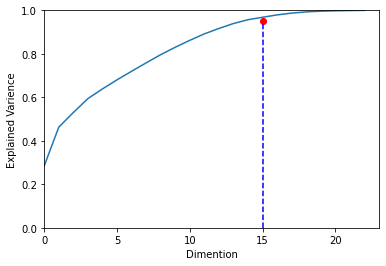

In [25]:
# 주성분과 데이터 투영 분산 정도 시각화
plt.plot(cumsum)
plt.plot(15, 0.95, 'ro')
plt.plot([15.0, 15.0], [0, 0.95], 'b--')
plt.axis([0,23, 0,1])
#plt.xticks(range(0,24))
plt.xlabel('Dimention')
plt.ylabel('Explained Varience')
plt.show()

In [26]:
creditPCADF = pd.DataFrame(creditPCA, columns=['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7', 'pca_8', 'pca_9',
                                               'pca_10', 'pca_11', 'pca_12', 'pca_13', 'pca_14', 'pca_15'])

In [27]:
creditPCADF['target'] = target

In [28]:
creditPCADF.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,target
0,-1.887962,-0.906109,-0.487795,-0.540015,0.997957,0.044404,-0.623687,0.112794,-0.189894,-0.084602,0.245364,3.264405,-1.048591,-0.318525,-0.197425,1
1,-0.764696,-2.109288,1.097314,-0.483480,0.858980,-0.235098,0.064742,0.093595,-0.153700,0.124035,0.141711,-0.881855,0.078162,-0.273304,0.438007,1
2,-0.847408,-1.072179,0.412178,-0.433564,0.770493,0.018665,-0.150472,-0.091884,-0.156179,0.089171,0.046222,-0.273012,0.519953,0.338603,0.014379,0
3,-0.196589,-0.809022,-0.818642,0.292878,0.909366,-0.284645,0.235221,-0.062984,0.114612,-0.067007,0.021318,0.039545,-0.711917,0.504354,0.056116,0
4,-0.840934,-0.072538,-1.005257,2.328013,-1.023124,0.794330,0.711069,0.124191,0.602528,-0.307478,1.035848,-0.608437,0.072147,1.327269,0.214260,0


In [29]:
creditPCADF.target.unique()

array([1, 0], dtype=int64)

In [30]:
target0 = creditPCADF[creditPCADF.target==0]
target1 = creditPCADF[creditPCADF.target==1]

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

- 전체 데이터 정확도

In [32]:
rcf2 = RandomForestClassifier(n_estimators=300, random_state=156)
scores2 = cross_val_score(rcf2, data_scaled, target, scoring='accuracy', cv=3 )

print('평균 정확도: {0:.4f}'.format(np.mean(scores2)))

평균 정확도: 0.8169


- 주성분 15개 뽑아낸 정확도

In [33]:
rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, creditPCADF.iloc[:, :-1], creditPCADF.target, scoring='accuracy', cv=3 )

print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

평균 정확도: 0.8126


---

In [35]:
from scikeras.wrappers import KerasRegressor, KerasClassifier
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import set_random_seed
from tensorflow.keras.backend import clear_session
import numpy as np

In [36]:
clear_session()
np.random.seed(42)
set_random_seed(42)

In [43]:
X = creditPCADF.iloc[:, :-1]
y = creditPCADF.iloc[:, -1]

In [53]:
# 파라미터 => KerasClassifier 또는 KerasRegrssor의 parameter로 추가됨
def build_model(n_hidden, neuron_1, neuron_2, neuron_3, learning_rate, input_shape=(15,)):
    
    model = Sequential()
    
    model.add(InputLayer(input_shape=input_shape))
    
#     for layer in range(n_hidden):
#         model.add(Dense(n_neurons, activation="relu"))
    model.add(Dense(neuron_1, activation="relu"))
    model.add(Dense(neuron_2, activation="relu"))
    model.add(Dense(neuron_3, activation="relu"))
        
    model.add(Dense(2, activation='softmax'))
    
    return model

In [59]:
keras_clf = KerasClassifier(build_model, 
                            n_hidden=1, 
                            neuron_1=30, 
                            neuron_2=50, 
                            neuron_3=20, 
                            learning_rate=0.001,
                            loss="sparse_categorical_crossentropy",
                            epochs=5)

In [60]:
keras_clf.fit(X, y)

Epoch 1/5
938/938 [==============================] - 1s 739us/step - loss: 0.4669
Epoch 2/5
938/938 [==============================] - 1s 731us/step - loss: 0.4440
Epoch 3/5
938/938 [==============================] - 1s 725us/step - loss: 0.4393
Epoch 4/5
938/938 [==============================] - 1s 754us/step - loss: 0.4362
Epoch 5/5
938/938 [==============================] - 1s 748us/step - loss: 0.4345


KerasClassifier(
	model=<function build_model at 0x0000024928B6F1F0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=sparse_categorical_crossentropy
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=5
	n_hidden=1
	neuron_1=30
	neuron_2=50
	neuron_3=20
	learning_rate=0.001
	class_weight=None
)

In [61]:
mse_test = keras_clf.score(X, y)

938/938 [==============================] - 1s 550us/step


In [62]:
print(f'mse_test ; {mse_test}')

mse_test ; 0.8189333333333333


In [63]:
keras_clf.get_params

<bound method BaseEstimator.get_params of KerasClassifier(
	model=<function build_model at 0x0000024928B6F1F0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=sparse_categorical_crossentropy
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=5
	n_hidden=1
	neuron_1=30
	neuron_2=50
	neuron_3=20
	learning_rate=0.001
	class_weight=None
)>

---

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
params = {
    "n_hidden": [1,3,5,10],
    "neuron_1": [10,30,60],
    "neuron_2": [30, 60, 90],
    "neuron_3": [10,50,70],
    "optimizer": ["adam", "sgd"],
    "learning_rate": [0.0001, 0.001, 0.1],
}
gs = GridSearchCV(keras_clf, params, 
                  refit=False, cv=3, 
                  scoring='accuracy',
                  verbose=False)

In [66]:
print(f'fitting....')
gs.fit(X, y)
print('EMD')

fitting....
Epoch 1/5
625/625 [==============================] - 1s 743us/step - loss: 0.4774
Epoch 2/5
625/625 [==============================] - 0s 749us/step - loss: 0.4418
Epoch 3/5
625/625 [==============================] - 0s 724us/step - loss: 0.4383
Epoch 4/5
625/625 [==============================] - 0s 735us/step - loss: 0.4352
Epoch 5/5
313/313 [==============================] - 0s 540us/step
Epoch 1/5
625/625 [==============================] - 1s 752us/step - loss: 0.5247
Epoch 2/5
625/625 [==============================] - 0s 769us/step - loss: 0.4592
Epoch 3/5
625/625 [==============================] - 0s 764us/step - loss: 0.4505
Epoch 4/5
625/625 [==============================] - 0s 731us/step - loss: 0.4466
Epoch 5/5
313/313 [==============================] - 0s 527us/step
Epoch 1/5
625/625 [==============================] - 1s 744us/step - loss: 0.5052
Epoch 2/5
625/625 [==============================] - 0s 767us/step - loss: 0.4564
Epoch 3/5
625/625 [===============

In [67]:
print(gs.best_score_, gs.best_params_, sep='\n')

0.8193999999999999
{'learning_rate': 0.1, 'n_hidden': 3, 'neuron_1': 60, 'neuron_2': 90, 'neuron_3': 70, 'optimizer': 'adam'}


---

In [101]:
keras_clf = KerasClassifier(build_model, 
                            n_hidden=1, 
                            neuron_1=30, 
                            neuron_2=50, 
                            neuron_3=20, 
                            learning_rate=0.001,
                            loss="sparse_categorical_crossentropy",
                            epochs=6)

In [102]:
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, test_size=0.2, random_state=11)

In [103]:
params = {
    "n_hidden": [3],
    "neuron_1": [60],
    "neuron_2": [90],
    "neuron_3": [70],
    "optimizer": ["adam"],
    "learning_rate": [0.1],
}
gs = GridSearchCV(keras_clf, params, 
                  refit=True, cv=3, 
                  scoring='accuracy',
                  verbose=False)

In [104]:
print(f'fitting....')
gs.fit(train_X, train_y)
print('EMD')

fitting....
Epoch 1/6
500/500 [==============================] - 1s 876us/step - loss: 0.4650
Epoch 2/6
500/500 [==============================] - 0s 790us/step - loss: 0.4411
Epoch 3/6
500/500 [==============================] - 0s 779us/step - loss: 0.4327
Epoch 4/6
500/500 [==============================] - 0s 892us/step - loss: 0.4289
Epoch 5/6
500/500 [==============================] - 0s 923us/step - loss: 0.4256
Epoch 6/6
250/250 [==============================] - 0s 569us/step
Epoch 1/6
500/500 [==============================] - 1s 849us/step - loss: 0.4648
Epoch 2/6
500/500 [==============================] - 0s 848us/step - loss: 0.4426
Epoch 3/6
500/500 [==============================] - 0s 851us/step - loss: 0.4361
Epoch 4/6
500/500 [==============================] - 0s 859us/step - loss: 0.4325
Epoch 5/6
500/500 [==============================] - 0s 850us/step - loss: 0.4278
Epoch 6/6
250/250 [==============================] - 0s 594us/step
Epoch 1/6
500/500 [===============

In [105]:
print(gs.best_score_, gs.best_params_, sep='\n')

0.8164166666666667
{'learning_rate': 0.1, 'n_hidden': 3, 'neuron_1': 60, 'neuron_2': 90, 'neuron_3': 70, 'optimizer': 'adam'}


In [106]:
model=gs.best_estimator_

In [107]:
model.score(test_X, test_y)

188/188 [==============================] - 0s 693us/step


0.819

In [108]:
model.predict(test_X.iloc[[0]])

1/1 [==============================] - 0s 19ms/step


array([0], dtype=int64)

In [109]:
test_y.iloc[0]

0